In [14]:
!pip install --no-deps fastbook

In [15]:
from fastbook import *
from fastai.vision.widgets import *
dir_path = '/kaggle/input/candle'
path = dir_path

In [16]:
fns = get_image_files(path)
print(len(fns))
fns[:10]

568


[Path('/kaggle/input/candle/bullish/QQQ_2009-06-16_to_2009-07-28_bullish.png'), Path('/kaggle/input/candle/bullish/QQQ_2007-05-30_to_2007-07-11_bullish.png'), Path('/kaggle/input/candle/bullish/QQQ_2023-09-21_to_2023-11-01_bullish.png'), Path('/kaggle/input/candle/bullish/QQQ_2021-05-25_to_2021-07-07_bullish.png'), Path('/kaggle/input/candle/bullish/QQQ_2010-01-25_to_2010-03-08_bullish.png'), Path('/kaggle/input/candle/bullish/QQQ_2020-10-14_to_2020-11-24_bullish.png'), Path('/kaggle/input/candle/bullish/QQQ_1999-10-20_to_1999-12-01_bullish.png'), Path('/kaggle/input/candle/bullish/QQQ_1999-10-07_to_1999-11-17_bullish.png'), Path('/kaggle/input/candle/bullish/QQQ_2018-05-29_to_2018-07-10_bullish.png'), Path('/kaggle/input/candle/bullish/QQQ_2003-11-11_to_2003-12-23_bullish.png')]

In [17]:
from pathlib import Path
import shutil

src  = Path(path)
dest = Path('charts')
if dest.exists():
    shutil.rmtree(dest)         

shutil.copytree(src, dest)        
print(f'Copied {src} → {dest}')

Copied /kaggle/input/candle → charts


In [18]:
path = dest
print(path)
fns = get_image_files(path)
failed = verify_images(fns)
failed

charts


[]

In [19]:
charts = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms = Resize(384, ResizeMethod.Pad, pad_mode='zeros')
)

In [20]:
batch_tfms = aug_transforms(
    do_flip=False,
    max_rotate=0,
    max_zoom=1.1,
    max_warp=0,
    max_lighting=0.2
)

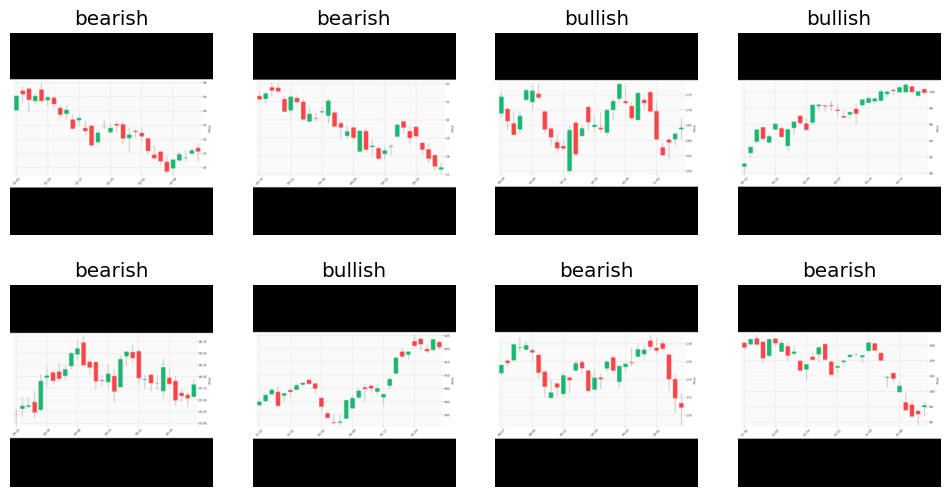

In [21]:
dls = charts.dataloaders(path, bs=64, batch_tfms=batch_tfms)
dls.valid.show_batch(max_n=8, nrows=2)

In [22]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.152874,0.745366,0.451327,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.991357,0.597835,0.353982,00:07
1,0.869030,0.552144,0.256637,00:07
2,0.748217,0.403216,0.185841,00:07
3,0.620140,0.382304,0.115044,00:07
4,0.533545,0.382839,0.132743,00:08
5,0.466085,0.382857,0.132743,00:07


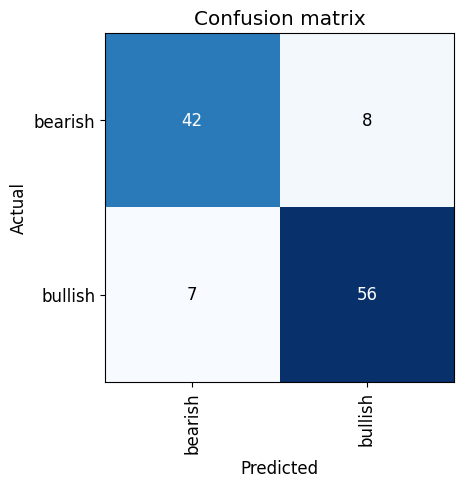

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

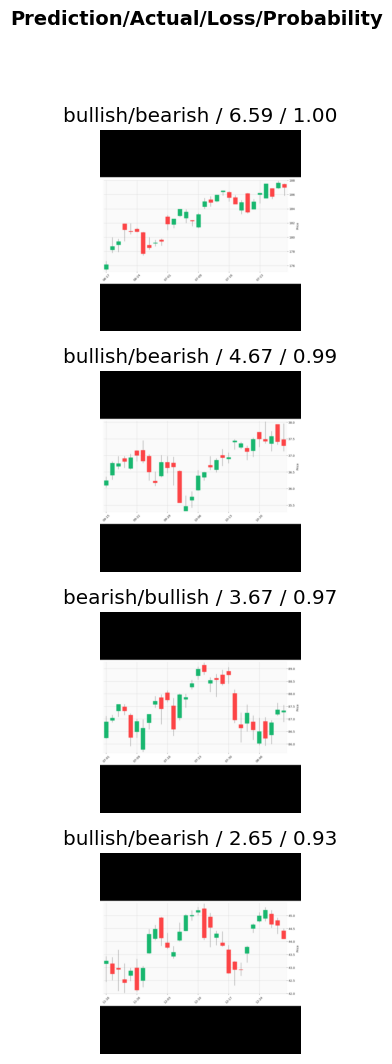

In [24]:
interp.plot_top_losses(4, nrows=4)

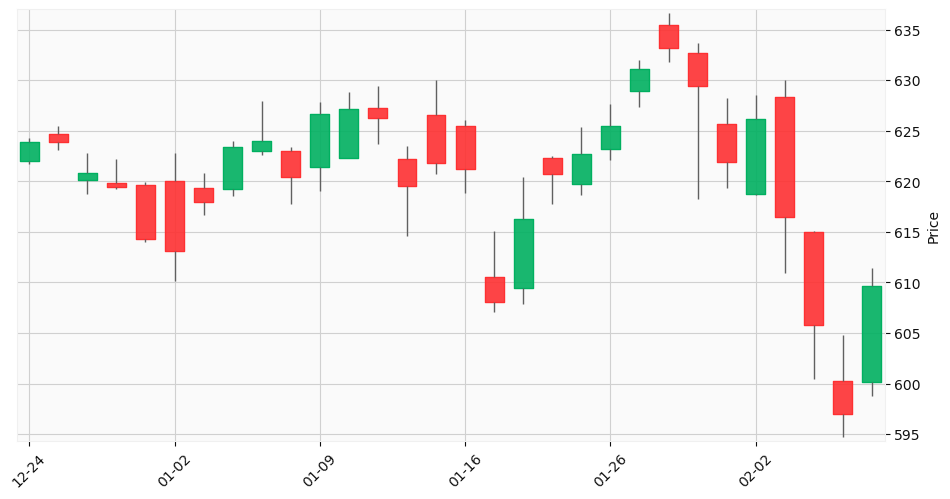

It's a bearish pattern.
Probability it's a bearish pattern: 0.9998
Probability it's a bullish pattern: 0.0002


In [26]:
from PIL import Image as PILImage
from IPython.display import display
sample_photo = PILImage.open("/kaggle/input/prediction-input/QQQ_in_last_30_trading_days_2026-02-09.png").convert("RGB")
display(sample_photo)
pattern_type,_,probs = learn.predict(sample_photo)

print(f"It's a {pattern_type} pattern.")
print(f"Probability it's a bearish pattern: {probs[0]:.4f}")
print(f"Probability it's a bullish pattern: {probs[1]:.4f}")